In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import fnmatch
import math
from scipy.linalg import svd

In [2]:
sns.load_dataset("mpg") #inbuilt dataset 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [8]:
df=pd.read_csv("Customer_feedback_bg_dataset.txt",sep="\t")

In [9]:
df

,Number,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
0,1,"Харесва ми това, че имат голямо разнообразие о...",compliments,store.bg,otzivi.bg,"Май, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
1,2,Бързо обслужване. Два пъти съм пазарувала отта...,compliments,store.bg,otzivi.bg,"Февруари, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
2,3,Некоректно обслужване. Изключително НЕКОРЕКТНО...,complaints,store.bg,otzivi.bg,"Декември, 2017",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
3,4,За последен път пазарувам там! Пазарувала съм ...,complaints,store.bg,otzivi.bg,"Октомври, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
4,5,Огромен асортимент от книги. Доста съм доволна...,mixed,store.bg,otzivi.bg,"Март, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
...,...,...,...,...,...,...,...
901,902,"Отлично обслужване, качествена стока, бърза до...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
902,903,Беше много лесно и бързо пазаруването и съм мн...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
903,904,Най-доволна съм от връзката със служителите. Б...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
904,905,"добро качество , перфектно обслужване , добри ...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2016",https://www.pazaruvaj.com/stores/smartfoni-bg-...


# Reading textfile using csv format

In [8]:
df=pd.read_csv("Customer_feedback_bg_dataset.txt",sep="\t")

In [9]:
df

,Number,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
0,1,"Харесва ми това, че имат голямо разнообразие о...",compliments,store.bg,otzivi.bg,"Май, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
1,2,Бързо обслужване. Два пъти съм пазарувала отта...,compliments,store.bg,otzivi.bg,"Февруари, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
2,3,Некоректно обслужване. Изключително НЕКОРЕКТНО...,complaints,store.bg,otzivi.bg,"Декември, 2017",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
3,4,За последен път пазарувам там! Пазарувала съм ...,complaints,store.bg,otzivi.bg,"Октомври, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
4,5,Огромен асортимент от книги. Доста съм доволна...,mixed,store.bg,otzivi.bg,"Март, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
...,...,...,...,...,...,...,...
901,902,"Отлично обслужване, качествена стока, бърза до...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
902,903,Беше много лесно и бързо пазаруването и съм мн...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
903,904,Най-доволна съм от връзката със служителите. Б...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
904,905,"добро качество , перфектно обслужване , добри ...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2016",https://www.pazaruvaj.com/stores/smartfoni-bg-...


In [10]:
df.columns

Index(['Number', 'Review', 'Category', 'OnlineStore', 'Source', 'ReviewMonth',
       'WebAddress'],
      dtype='object')

In [11]:
df.to_csv("txttocsv")

In [12]:
df=pd.read_csv("txttocsv")

In [13]:
df

,Unnamed: 0,Number,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
0,0,1,"Харесва ми това, че имат голямо разнообразие о...",compliments,store.bg,otzivi.bg,"Май, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
1,1,2,Бързо обслужване. Два пъти съм пазарувала отта...,compliments,store.bg,otzivi.bg,"Февруари, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
2,2,3,Некоректно обслужване. Изключително НЕКОРЕКТНО...,complaints,store.bg,otzivi.bg,"Декември, 2017",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
3,3,4,За последен път пазарувам там! Пазарувала съм ...,complaints,store.bg,otzivi.bg,"Октомври, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
4,4,5,Огромен асортимент от книги. Доста съм доволна...,mixed,store.bg,otzivi.bg,"Март, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
...,...,...,...,...,...,...,...,...
901,901,902,"Отлично обслужване, качествена стока, бърза до...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
902,902,903,Беше много лесно и бързо пазаруването и съм мн...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
903,903,904,Най-доволна съм от връзката със служителите. Б...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
904,904,905,"добро качество , перфектно обслужване , добри ...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2016",https://www.pazaruvaj.com/stores/smartfoni-bg-...


# Creating dataframe from inbulit iris which is in dictionary format

In [28]:
from sklearn.datasets import load_iris
df=load_iris()

In [29]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
df1=pd.DataFrame(df.data,columns=df.feature_names)

In [37]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [73]:
df1["species"]=df.target

In [74]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
df1["species"]=pd.cut(df.target,bins=[0,1,2,3],labels=df.target_names)

In [43]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,versicolor
146,6.3,2.5,5.0,1.9,versicolor
147,6.5,3.0,5.2,2.0,versicolor
148,6.2,3.4,5.4,2.3,versicolor


In [45]:
df1.species.unique()

[NaN, 'setosa', 'versicolor']
Categories (2, object): ['setosa' < 'versicolor']

In [48]:
df1.species.value_counts()

setosa        50
versicolor    50
virginica      0
Name: species, dtype: int64

In [50]:
df1.species.isna().sum()

50

In [61]:
df1.species.replace({'NaN':"virginica"},inplace=True)

In [62]:
df1.species.value_counts()

setosa        50
versicolor    50
virginica      0
Name: species, dtype: int64

In [65]:
df1.isna().sum()

sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
species              50
dtype: int64

In [66]:
df1.fillna("virginica",inplace=True)

In [69]:
df1.species.unique()

['virginica', 'setosa', 'versicolor']
Categories (3, object): ['setosa' < 'versicolor' < 'virginica']

In [70]:
df1.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [76]:
df1.species.replace({0:"virginica",1:"setosa",2:"versicolor"},inplace=True)

In [77]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,virginica
1,4.9,3.0,1.4,0.2,virginica
2,4.7,3.2,1.3,0.2,virginica
3,4.6,3.1,1.5,0.2,virginica
4,5.0,3.6,1.4,0.2,virginica
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,versicolor
146,6.3,2.5,5.0,1.9,versicolor
147,6.5,3.0,5.2,2.0,versicolor
148,6.2,3.4,5.4,2.3,versicolor


# Xls file

In [80]:
df=pd.read_excel("Customer_feedback_bg_dataset.xls")

In [81]:
df

,Number,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
0,1,"Харесва ми това, че имат голямо разнообразие о...",compliments,store.bg,otzivi.bg,"Май, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
1,2,Бързо обслужване. Два пъти съм пазарувала отта...,compliments,store.bg,otzivi.bg,"Февруари, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
2,3,Некоректно обслужване. Изключително НЕКОРЕКТНО...,complaints,store.bg,otzivi.bg,"Декември, 2017",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
3,4,За последен път пазарувам там! Пазарувала съм ...,complaints,store.bg,otzivi.bg,"Октомври, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
4,5,Огромен асортимент от книги. Доста съм доволна...,mixed,store.bg,otzivi.bg,"Март, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
...,...,...,...,...,...,...,...
901,902,"Отлично обслужване, качествена стока, бърза до...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
902,903,Беше много лесно и бързо пазаруването и съм мн...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
903,904,Най-доволна съм от връзката със служителите. Б...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
904,905,"добро качество , перфектно обслужване , добри ...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2016",https://www.pazaruvaj.com/stores/smartfoni-bg-...


# xml 

In [ ]:
df=pd.read_html("Customer_feedback_bg_dataset.xml") #use beautiful_Soup

In [ ]:
df=pd.read_json()#for json file

In [11]:
df.shape

(906, 7)

In [12]:
df.isna().sum()

Number         0
Review         0
Category       0
OnlineStore    0
Source         0
ReviewMonth    0
WebAddress     0
dtype: int64

In [14]:
df.describe(include="all")

,Number,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
count,906.00000,906,906,906,906,906,906
unique,NaN,906,4,87,2,77,117
top,NaN,лесно се поръчва\nбърза реакция от страна на м...,compliments,sapirshop.com,pazaruvaj.com,"Октомври, 2017",https://www.pazaruvaj.com/stores/www-sapirshop...
freq,NaN,1,540,192,620,97,192
mean,453.50000,NaN,NaN,NaN,NaN,NaN,NaN
std,261.68397,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,227.25000,NaN,NaN,NaN,NaN,NaN,NaN
50%,453.50000,NaN,NaN,NaN,NaN,NaN,NaN
75%,679.75000,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.corr()

,Number
Number,1.0


In [17]:
df

,Number,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
0,1,"Харесва ми това, че имат голямо разнообразие о...",compliments,store.bg,otzivi.bg,"Май, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
1,2,Бързо обслужване. Два пъти съм пазарувала отта...,compliments,store.bg,otzivi.bg,"Февруари, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
2,3,Некоректно обслужване. Изключително НЕКОРЕКТНО...,complaints,store.bg,otzivi.bg,"Декември, 2017",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
3,4,За последен път пазарувам там! Пазарувала съм ...,complaints,store.bg,otzivi.bg,"Октомври, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
4,5,Огромен асортимент от книги. Доста съм доволна...,mixed,store.bg,otzivi.bg,"Март, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
...,...,...,...,...,...,...,...
901,902,"Отлично обслужване, качествена стока, бърза до...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
902,903,Беше много лесно и бързо пазаруването и съм мн...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
903,904,Най-доволна съм от връзката със служителите. Б...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
904,905,"добро качество , перфектно обслужване , добри ...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2016",https://www.pazaruvaj.com/stores/smartfoni-bg-...


In [18]:
df.drop(columns="Number",inplace=True)

In [19]:
df

,Review,Category,OnlineStore,Source,ReviewMonth,WebAddress
0,"Харесва ми това, че имат голямо разнообразие о...",compliments,store.bg,otzivi.bg,"Май, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
1,Бързо обслужване. Два пъти съм пазарувала отта...,compliments,store.bg,otzivi.bg,"Февруари, 2014",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
2,Некоректно обслужване. Изключително НЕКОРЕКТНО...,complaints,store.bg,otzivi.bg,"Декември, 2017",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
3,За последен път пазарувам там! Пазарувала съм ...,complaints,store.bg,otzivi.bg,"Октомври, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
4,Огромен асортимент от книги. Доста съм доволна...,mixed,store.bg,otzivi.bg,"Март, 2016",http://www.otzivi.bg/bg/catalog/onlayn-magazin...
...,...,...,...,...,...,...
901,"Отлично обслужване, качествена стока, бърза до...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
902,Беше много лесно и бързо пазаруването и съм мн...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
903,Най-доволна съм от връзката със служителите. Б...,compliments,smartfoni.bg,pazaruvaj.com,"Март, 2017",https://www.pazaruvaj.com/stores/smartfoni-bg-...
904,"добро качество , перфектно обслужване , добри ...",compliments,smartfoni.bg,pazaruvaj.com,"Март, 2016",https://www.pazaruvaj.com/stores/smartfoni-bg-...


In [102]:
df=pd.read_csv("Horror movies.csv")

In [39]:
df

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3323,Victor Frankenstein (2015),Drama| Horror| Sci-Fi| Thriller,25-Nov-15,USA,PG-13,6.0,110 min,Directed by Paul McGuigan. With Daniel Radclif...,Daniel Radcliffe|Jessica Brown Findlay|Bronson...,English,"London, England, UK","$40,000,000"
3324,The Exorcism of Molly Hartley (2015),Horror,9-Oct-15,USA,UNRATED,4.6,96 min,"Directed by Steven R. Monroe. With Sarah Lind,...",Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,English,"Winnipeg, Manitoba, Canada",NaN
3325,Talon Falls (2017),Horror,13-Oct-17,USA,NaN,4.6,75 min,"Directed by Joshua Shreve. With Brad Bell, Jor...",Brad Bell|Jordyn Rudolph|Ryan Rudolph|Morgan W...,English,NaN,NaN
3326,BloodRayne: The Third Reich (2011),Action| Adventure| Fantasy| Horror,17-Mar-12,Japan,R,3.0,79 min,"Directed by Uwe Boll. With Natassia Malthe, Br...",Natassia Malthe|Brendan Fletcher|Michael Paré|...,English,"Zagreb, Croatia","$10,000,000"


In [40]:
df.isna().sum()

Title                   0
Genres                  1
Release Date            0
Release Country         0
Movie Rating         1877
Review Rating         252
Movie Run Time        544
Plot                    1
Cast                   14
Language               71
Filming Locations    1232
Budget               2094
dtype: int64

In [41]:
df[df.Genres.isna()]

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
866,The Returned (2017),NaN,2017,USA,NaN,NaN,NaN,"A Horror/Thriller about a young couple, strand...",NaN,NaN,NaN,NaN


In [27]:
df.shape

(3328, 12)

In [42]:
df.drop(index=866,inplace=True)

In [43]:
df.isna().sum()

Title                   0
Genres                  0
Release Date            0
Release Country         0
Movie Rating         1876
Review Rating         251
Movie Run Time        543
Plot                    1
Cast                   13
Language               70
Filming Locations    1231
Budget               2093
dtype: int64

In [44]:
df.shape

(3327, 12)

In [48]:
df[df.Plot.isna()]

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
1298,Lake Bodom (2017),Horror| Mystery| Thriller,27-Jan-17,New Zealand,NaN,NaN,NaN,NaN,NaN,English,NaN,NaN


In [50]:
df.describe(include="all")

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
count,3327,3327,3327,3327,1451,3076.000000,2784,3326,3314,3257,2096,1234
unique,3302,261,1332,72,11,NaN,113,3309,3296,187,1171,417
top,Model Hunger (2016),Horror,2017,USA,NOT RATED,NaN,90 min,Directed by Steven Kastrissios. With Gëzim Rud...,Stephen Lestat|Logan Littlefield|Ronee Collins...,English,"Los Angeles, California, USA","$1,000,000"
freq,2,1059,118,2091,699,NaN,237,2,2,2421,186,72
mean,NaN,NaN,NaN,NaN,NaN,5.077016,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.474272,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3327 entries, 0 to 3327
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3327 non-null   object 
 1   Genres             3327 non-null   object 
 2   Release Date       3327 non-null   object 
 3   Release Country    3327 non-null   object 
 4   Movie Rating       1451 non-null   object 
 5   Review Rating      3076 non-null   float64
 6   Movie Run Time     2784 non-null   object 
 7   Plot               3326 non-null   object 
 8   Cast               3314 non-null   object 
 9   Language           3257 non-null   object 
 10  Filming Locations  2096 non-null   object 
 11  Budget             1234 non-null   object 
dtypes: float64(1), object(11)
memory usage: 337.9+ KB


In [53]:
df["Movie Rating"].unique()

array([nan, 'NOT RATED', 'PG-13', 'UNRATED', 'R', 'X', 'TV-MA', 'TV-14',
       'PG', 'E', 'TV-PG', 'NC-17'], dtype=object)

In [54]:
df["Review Rating"].unique()

array([3.9, nan, 3.7, 5.8, 5.1, 6.5, 4.6, 5.4, 5.3, 3.6, 5.9, 2.8, 6. ,
       2.7, 7.1, 3.4, 4.7, 4. , 6.6, 4.5, 4.1, 4.3, 5. , 7.2, 6.2, 5.7,
       5.6, 6.9, 7. , 7.3, 6.3, 2.1, 4.2, 4.4, 8.4, 3.8, 2. , 3.5, 8.3,
       3.1, 1.4, 2.3, 2.2, 4.9, 2.5, 2.9, 7.9, 3. , 2.4, 4.8, 6.8, 7.4,
       3.3, 6.7, 1.9, 6.4, 8.7, 5.5, 6.1, 3.2, 7.7, 8. , 5.2, 7.8, 8.6,
       7.6, 9. , 7.5, 2.6, 1.7, 8.2, 1.6, 8.9, 8.1, 9.5, 9.3, 8.8, 8.5,
       9.2, 1.8, 1.2, 9.1, 1. , 9.4, 9.6, 9.8, 1.5, 1.3])

In [105]:
df=pd.read_csv("house_prices.csv")

In [58]:
df

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1321,7917,175000
1322,13175,210000
1323,9042,266500
1324,9717,142125


In [60]:
df.shape

(1326, 2)

## First 10 rows  

In [89]:
df[0:10]

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
5,14115,143000
6,10084,307000
7,10382,200000
8,6120,129900
9,7420,118000


## Last 10 rows

In [101]:
df[-10:]

,LotArea,SalePrice
1316,9000,136000
1317,9262,287090
1318,3675,145000
1319,17217,84500
1320,7500,185000
1321,7917,175000
1322,13175,210000
1323,9042,266500
1324,9717,142125
1325,9937,147500


In [99]:
df.iloc[:,0:1]

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1321,7917
1322,13175
1323,9042
1324,9717


In [114]:
df[df.Genres.isin(["Sci-Fi"])]



,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget


In [107]:
df.Genres.unique()

array([' Drama| Horror| Thriller', ' Horror', ' Comedy| Horror| Thriller',
       ' Crime| Drama| Horror', ' Horror| Thriller',
       ' Action| Drama| Horror| Sci-Fi', ' Horror| Mystery| Thriller',
       ' Comedy| Horror', ' Adventure| Comedy| Horror', ' Horror| Sci-Fi',
       ' Drama| Fantasy| Horror| Mystery| Thriller',
       ' Action| Horror| Thriller', ' Drama| Horror| Romance| Thriller',
       ' Fantasy| Horror| Thriller', ' Drama| Horror',
       ' Action| Crime| Horror| Sci-Fi| Thriller',
       ' Horror| Romance| Thriller', ' Drama| Horror| Mystery| Romance',
       ' Action| Horror', ' Crime| Horror| Romance| Thriller',
       ' Action| Horror| Thriller| War', ' Action| Comedy| Horror',
       ' Action| Drama| Horror',
       ' Adventure| Comedy| Drama| Fantasy| Horror| Thriller',
       ' Comedy| Fantasy| Horror', ' Crime| Horror| Thriller',
       ' Drama| Fantasy| Horror| Thriller', ' Drama| Horror| Mystery',
       ' Adventure| Horror| Mystery| Thriller',
       ' Act

# from mid

In [134]:
df[25:70]

,LotArea,SalePrice
25,7200,134800
26,11478,306000
27,16321,207500
28,6324,68500
29,8500,40000
30,8544,149350
31,11049,179900
32,10552,165500
33,7313,277500
34,13418,309000


<AxesSubplot:>

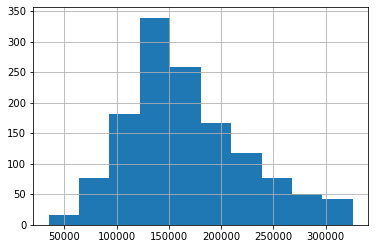

In [4]:
df.SalePrice.hist()

In [6]:
df.corr()

,LotArea,SalePrice
LotArea,1.000000,0.390102
SalePrice,0.390102,1.000000


<AxesSubplot:>

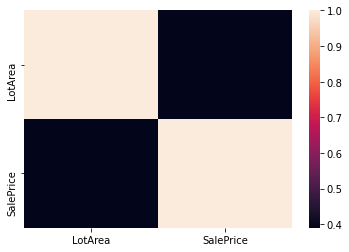

In [8]:
sns.heatmap(df.corr())

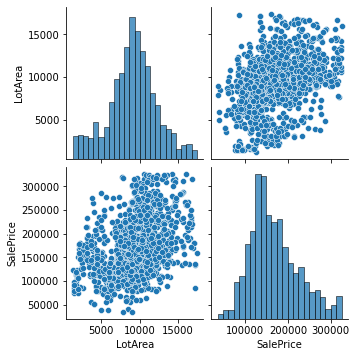

In [10]:
sns.pairplot(df)

<AxesSubplot:>

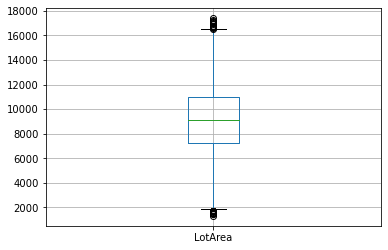

In [12]:
df.boxplot("LotArea")

Text(0.5, 0, 'LotArea')

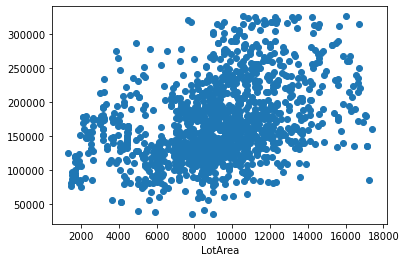

In [19]:
plt.scatter(df.LotArea,df.SalePrice)
plt.xlabel("LotArea")


(array([[ 0., 16., 11., 13., 15.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  3.,  7., 23., 22., 11.,  4.,  2.,  1.,  0.],
        [ 4., 18., 27., 19.,  4.,  7.,  4.,  2.,  2.,  0.],
        [ 0., 10., 39., 61., 22., 22.,  5.,  3.,  2.,  1.],
        [ 7., 15., 49., 98., 61., 47., 26.,  9.,  3.,  4.],
        [ 2.,  8., 34., 73., 65., 32., 30., 20., 18., 10.],
        [ 0.,  5., 10., 32., 40., 23., 22., 23., 10., 14.],
        [ 0.,  1.,  5., 13., 19., 15., 14.,  6.,  6.,  5.],
        [ 0.,  0.,  0.,  3.,  6.,  4.,  6.,  7.,  8.,  6.],
        [ 0.,  1.,  0.,  4.,  4.,  6.,  6.,  5.,  1.,  2.]]),
 array([ 1300.,  2910.,  4520.,  6130.,  7740.,  9350., 10960., 12570.,
        14180., 15790., 17400.]),
 array([ 34900.,  64010.,  93120., 122230., 151340., 180450., 209560.,
        238670., 267780., 296890., 326000.]),
 <matplotlib.collections.QuadMesh at 0x1e3697e3df0>)

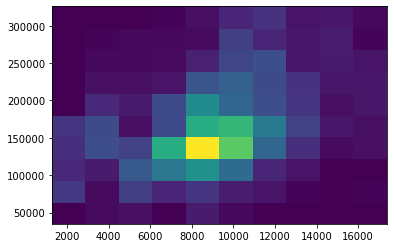

In [26]:
plt.hist2d(df.LotArea,df.SalePrice)

(array([ 55.,  76.,  87., 165., 319., 292., 179.,  84.,  40.,  29.]),
 array([ 1300.,  2910.,  4520.,  6130.,  7740.,  9350., 10960., 12570.,
        14180., 15790., 17400.]),
 <BarContainer object of 10 artists>)

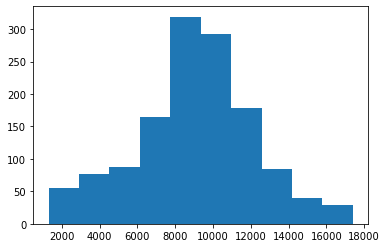

In [28]:
plt.hist(df.LotArea)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LotArea    1326 non-null   int64
 1   SalePrice  1326 non-null   int64
dtypes: int64(2)
memory usage: 20.8 KB


<AxesSubplot:>

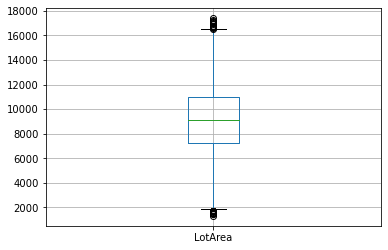

In [30]:
df.boxplot("LotArea")

# Applying Linear regression

In [31]:
df

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1321,7917,175000
1322,13175,210000
1323,9042,266500
1324,9717,142125


In [67]:
x_mean=np.mean(df.LotArea)
x_mean

9076.268476621417

In [68]:
np.mean(df)

LotArea        9076.268477
SalePrice    167433.042232
dtype: float64

In [69]:
df["x_minus_mean"]=df.LotArea-x_mean

In [70]:
df

,LotArea,SalePrice,x_minus_mean
0,8450,208500,-626.268477
1,9600,181500,523.731523
2,11250,223500,2173.731523
3,9550,140000,473.731523
4,14260,250000,5183.731523
...,...,...,...
1321,7917,175000,-1159.268477
1322,13175,210000,4098.731523
1323,9042,266500,-34.268477
1324,9717,142125,640.731523


In [71]:
y_mean=np.mean(df.SalePrice)
y_mean

167433.0422322775

In [72]:
df["y_minus_ymean"]=df.SalePrice-y_mean
df

,LotArea,SalePrice,x_minus_mean,y_minus_ymean
0,8450,208500,-626.268477,41066.957768
1,9600,181500,523.731523,14066.957768
2,11250,223500,2173.731523,56066.957768
3,9550,140000,473.731523,-27433.042232
4,14260,250000,5183.731523,82566.957768
...,...,...,...,...
1321,7917,175000,-1159.268477,7566.957768
1322,13175,210000,4098.731523,42566.957768
1323,9042,266500,-34.268477,99066.957768
1324,9717,142125,640.731523,-25308.042232


In [73]:
#now calculating covariance and variance for m 
#cov(x,y)=submission(x-x_mean)*(y-y_mean)

cov=sum(df.x_minus_mean*df.y_minus_ymean)

In [74]:
variance= sum(df.x_minus_mean*df.x_minus_mean)

In [75]:
m= cov/variance

In [76]:
m

7.151198222377802

In [77]:
#c=y_mean-m*x_mean

c=y_mean-m*x_mean
c

102526.84723643874

In [78]:
df["y_pred"]=m*df.LotArea+c

In [79]:
df

,LotArea,SalePrice,x_minus_mean,y_minus_ymean,y_pred
0,8450,208500,-626.268477,41066.957768,162954.472216
1,9600,181500,523.731523,14066.957768,171178.350171
2,11250,223500,2173.731523,56066.957768,182977.827238
3,9550,140000,473.731523,-27433.042232,170820.790260
4,14260,250000,5183.731523,82566.957768,204502.933888
...,...,...,...,...,...
1321,7917,175000,-1159.268477,7566.957768,159142.883563
1322,13175,210000,4098.731523,42566.957768,196743.883816
1323,9042,266500,-34.268477,99066.957768,167187.981563
1324,9717,142125,640.731523,-25308.042232,172015.040363


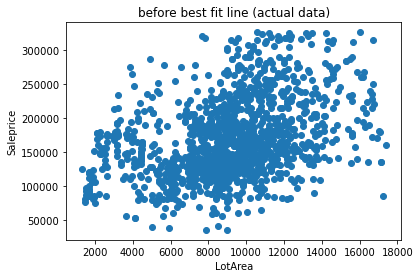

In [80]:
plt.scatter(df.LotArea,df.SalePrice)
plt.title('before best fit line (actual data)')
plt.xlabel('LotArea')
plt.ylabel('Saleprice')
plt.show()

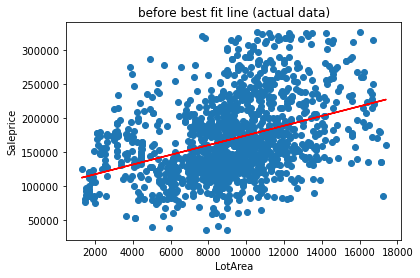

In [81]:
plt.scatter(df.LotArea,df.SalePrice)
plt.title('before best fit line (actual data)')
plt.plot(df.LotArea,m*df.LotArea+c,"r-")
plt.xlabel('LotArea')
plt.ylabel('Saleprice')
plt.show()

# Residuals

In [82]:
df["E"]=df.SalePrice-df.y_pred

In [83]:
df

,LotArea,SalePrice,x_minus_mean,y_minus_ymean,y_pred,E
0,8450,208500,-626.268477,41066.957768,162954.472216,45545.527784
1,9600,181500,523.731523,14066.957768,171178.350171,10321.649829
2,11250,223500,2173.731523,56066.957768,182977.827238,40522.172762
3,9550,140000,473.731523,-27433.042232,170820.790260,-30820.790260
4,14260,250000,5183.731523,82566.957768,204502.933888,45497.066112
...,...,...,...,...,...,...
1321,7917,175000,-1159.268477,7566.957768,159142.883563,15857.116437
1322,13175,210000,4098.731523,42566.957768,196743.883816,13256.116184
1323,9042,266500,-34.268477,99066.957768,167187.981563,99312.018437
1324,9717,142125,640.731523,-25308.042232,172015.040363,-29890.040363


# sse sum of squares error

In [84]:
df["E_square"]=df.E*df.E

In [85]:
df

,LotArea,SalePrice,x_minus_mean,y_minus_ymean,y_pred,E,E_square
0,8450,208500,-626.268477,41066.957768,162954.472216,45545.527784,2.074395e+09
1,9600,181500,523.731523,14066.957768,171178.350171,10321.649829,1.065365e+08
2,11250,223500,2173.731523,56066.957768,182977.827238,40522.172762,1.642046e+09
3,9550,140000,473.731523,-27433.042232,170820.790260,-30820.790260,9.499211e+08
4,14260,250000,5183.731523,82566.957768,204502.933888,45497.066112,2.069983e+09
...,...,...,...,...,...,...,...
1321,7917,175000,-1159.268477,7566.957768,159142.883563,15857.116437,2.514481e+08
1322,13175,210000,4098.731523,42566.957768,196743.883816,13256.116184,1.757246e+08
1323,9042,266500,-34.268477,99066.957768,167187.981563,99312.018437,9.862877e+09
1324,9717,142125,640.731523,-25308.042232,172015.040363,-29890.040363,8.934145e+08


In [86]:
sse=sum(df.E_square)
sse

3674475464734.432

# Mean_sqaured_error

In [88]:
df.count().iloc[0]

1326

In [89]:
N=df.count().iloc[0]

In [90]:
Mse= sse/N
Mse

2771097635.546329

# Root mean sqaure error

In [92]:
rmse= math.sqrt(Mse)
rmse

52641.21612905926

# R-Square

In [93]:
#r_square= 1- sse/tss

#tss=total sum of squares (submission of y-y_mean)^2


In [95]:
df["y_minus_ymean_square"]=df.y_minus_ymean**2

In [97]:
tss=sum(df.y_minus_ymean_square)

In [98]:
tss

4334023966683.64

In [99]:
r_square= 1-sse/tss
r_square

0.1521792465891436

# PCA

In [100]:
from numpy import mean
from numpy.linalg import eig
from numpy import cov

In [106]:
# calculate the mean of each column
M = mean(df.T, axis=1)
print("Mean of Columns")
print(M)

Mean of Columns
LotArea        9076.268477
SalePrice    167433.042232
dtype: float64


In [109]:
c=df-M
c

,LotArea,SalePrice
0,-626.268477,41066.957768
1,523.731523,14066.957768
2,2173.731523,56066.957768
3,473.731523,-27433.042232
4,5183.731523,82566.957768
...,...,...
1321,-1159.268477,7566.957768
1322,4098.731523,42566.957768
1323,-34.268477,99066.957768
1324,640.731523,-25308.042232


In [110]:
print("calculate covariance matrix of centered matrix")
V = cov(c.T)
print(V)

calculate covariance matrix of centered matrix
[[9.73359400e+06 6.96068601e+07]
 [6.96068601e+07 3.27096148e+09]]


In [112]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print()
print(values)

[[-0.99977251 -0.02132919]
 [ 0.02132919 -0.99977251]]

[8.24859819e+06 3.27244648e+09]


In [113]:
P = vectors.T.dot(c.T)
print(P.T)

[[  1502.05097465 -41044.25752003]
 [  -223.57555464 -14074.92840191]
 [  -977.37418571 -56100.56685778]
 ...
 [  2147.27870559 -99043.68980324]
 [ -1180.385818    25288.61854346]
 [ -1285.69137002  19910.14889673]]


# Matrix

In [115]:
a=np.matrix('1 -3 -2 4; 1 -3 1 1; 0 0 -1 1')
a

matrix([[ 1, -3, -2,  4],
        [ 1, -3,  1,  1],
        [ 0,  0, -1,  1]])

In [118]:
a.shape[1]

4

In [119]:
rank= np.linalg.matrix_rank(a)
rank

2

In [120]:
#nullity + rank = no. of features
#nullity = no.of fea. - rank

nullity= a.shape[1]- rank
nullity

2

In [10]:
a= np.array([[-1,2,2]])
a

array([[-1,  2,  2]])

In [11]:
b= a.T.dot(a)

In [12]:
b

array([[ 1, -2, -2],
       [-2,  4,  4],
       [-2,  4,  4]])

In [15]:
u,s,v= np.linalg.svd(b,full_matrices=True)
print(u)
print()
print(s)
print()
print(v)

[[-0.33333333  0.66666667  0.66666667]
 [ 0.66666667 -0.33333333  0.66666667]
 [ 0.66666667  0.66666667 -0.33333333]]

[9. 0. 0.]

[[-0.33333333  0.66666667  0.66666667]
 [ 0.         -0.70710678  0.70710678]
 [-0.94280904 -0.23570226 -0.23570226]]
